In [1]:
# Import data

import json
import collections

with open('data_analysis.json', encoding='utf-8') as data_file:
    data = json.loads(data_file.read()) 

In [2]:
# data is list of dictionaries
data

[{'address': '10085 SCRIPPS RANCH CT STE A',
  'category_code': '44420000',
  'city': 'SAN DIEGO',
  'headcount': '50 to 99',
  'name': 'AMD CUSTOM',
  'phone': '3123628000',
  'revenue': '$20 to 50 Million',
  'state': 'CA',
  'time_in_business': '10+ years',
  'zip': '92131'},
 {'address': '2566 SHALLOWFORD RD NE STE 104 # 302',
  'category_code': '31490000',
  'city': 'ATLANTA',
  'headcount': '1 to 4',
  'name': 'Real Hope Real Estate Inc',
  'phone': None,
  'revenue': 'Less Than $500,000',
  'state': 'GA',
  'time_in_business': '10+ years',
  'zip': '30345'},
 {'address': '212 E MAIN ST',
  'category_code': '53120000',
  'city': 'NEOSHO',
  'headcount': '1 to 4',
  'name': 'Jimmy Sexton Photography',
  'phone': '4046331779',
  'revenue': 'Less Than $500,000',
  'state': 'MO',
  'time_in_business': '10+ years',
  'zip': '64850'},
 {'address': '6032 CHEROKEE DR',
  'category_code': '54000000',
  'city': 'CINCINNATI',
  'headcount': '1 to 4',
  'name': "YOU'RE ART",
  'phone': '4174

In [3]:
# Total number of businesses
len(data)

1000000

# Part I: Fill Rate

In [4]:
# identify number of records with a value
def fill_rate(data, key):
    return len([i for i in data if isinstance(i[key],str)])

# Part II: True valued fill rate

In [5]:
# Fill_Rate_Test: try to first identify patterns in each field
class Fill_Rate_Test(object):
    
    def __init__(self, data, key):
        self.data = data
        self.key = key
        
    # tease out "bad" data by looking at string length: address, city, name, phone, state, zip, category_code
    def len_counter(self):
        return collections.Counter([len(i[self.key]) for i in self.data if isinstance(i[self.key],str)])
    
    # tease out "bad" data by looking at categorical values: headcount, revenue, time_in_business
    def cat_counter(self):
        return collections.Counter([j[self.key] for j in self.data if isinstance(j[self.key],str)])

In [6]:
# Get actual values instead of count so that we can use this output to check if a field is unique
def relevant_data(data, key, len_criteria, cat_criteria):
    return [i[key] for i in data if isinstance(i[key],str) and len(i[key])>len_criteria and i[key] not in cat_criteria]


** Field 1: Address **  
- address with length<=4 is "bad"

In [7]:
field_address = Fill_Rate_Test(data,'address')
field_address.len_counter()

Counter({0: 16,
         1: 31,
         3: 1,
         4: 28,
         5: 1,
         6: 15,
         7: 90,
         8: 920,
         9: 2911,
         10: 10647,
         11: 28499,
         12: 54124,
         13: 81818,
         14: 91887,
         15: 95683,
         16: 93535,
         17: 87245,
         18: 77223,
         19: 65610,
         20: 55795,
         21: 47087,
         22: 40446,
         23: 35464,
         24: 30901,
         25: 26699,
         26: 20438,
         27: 16363,
         28: 11036,
         29: 8103,
         30: 5639,
         31: 3993,
         32: 2864,
         33: 1848,
         34: 1010,
         35: 714,
         36: 511,
         37: 265,
         38: 237,
         39: 101,
         40: 76,
         41: 33,
         42: 24,
         43: 7,
         44: 16,
         45: 6,
         46: 3,
         47: 4,
         48: 3,
         49: 2,
         50: 1})

In [8]:
collections.Counter([d['address'] for d in data if isinstance(d['address'],str) and len(d['address'])==5])

Counter({'1 BYU': 1})

** Field 2: city **  
- city with length<1 is bad
- For length=1, we also need to exclude " ", "0"
- For length=4, ok as long as not "none" or "null"

In [9]:
field_city = Fill_Rate_Test(data,'city')
field_city.len_counter()

Counter({0: 19,
         1: 24,
         3: 838,
         4: 17931,
         5: 50799,
         6: 121942,
         7: 156680,
         8: 137889,
         9: 130751,
         10: 128597,
         11: 92861,
         12: 59314,
         13: 41943,
         14: 21107,
         15: 14508,
         16: 14456,
         17: 4985,
         18: 2532,
         19: 1362,
         20: 796,
         21: 193,
         22: 285,
         23: 35,
         24: 3,
         25: 118,
         26: 1})

In [10]:
collections.Counter([d['city'] for d in data if isinstance(d['city'],str) and len(d['city'])==1])

Counter({' ': 11, '0': 13})

** Field 3: name**  
- length<1 is bad
- exclude ' ', "0", "none" and "null"

In [11]:
field_name = Fill_Rate_Test(data,'name')
field_name.len_counter()

Counter({0: 11,
         1: 33,
         2: 88,
         3: 1654,
         4: 3212,
         5: 2621,
         6: 4252,
         7: 7127,
         8: 9289,
         9: 13474,
         10: 16168,
         11: 20733,
         12: 25207,
         13: 30792,
         14: 35277,
         15: 40633,
         16: 43833,
         17: 48762,
         18: 50784,
         19: 52106,
         20: 53232,
         21: 50382,
         22: 49344,
         23: 47909,
         24: 45073,
         25: 43020,
         26: 40574,
         27: 38125,
         28: 35398,
         29: 32120,
         30: 29585,
         31: 18972,
         32: 16763,
         33: 14234,
         34: 11878,
         35: 10341,
         36: 8167,
         37: 7197,
         38: 6067,
         39: 5431,
         40: 5244,
         41: 4246,
         42: 3510,
         43: 2908,
         44: 2360,
         45: 1999,
         46: 1655,
         47: 1374,
         48: 1234,
         49: 1334,
         50: 2169,
         51: 343,
  

In [12]:
collections.Counter([d['name'] for d in data if isinstance(d['name'],str) and len(d['name'])==1])

Counter({' ': 15, '0': 16, 'A': 1, 'Q': 1})

In [13]:
name_freq = collections.Counter([d['name'] for d in data if isinstance(d['name'],str)])

In [14]:
# Should we include "0" as valid data for name? is having count 16 common? 
repeat_names_over_16 = {key:val for (key,val) in name_freq.items() if val>=16}
print(len(name_freq))
print(len(repeat_names_over_16))

890722
753


Out of 890722 unique names, 753 business names appear more than 15 times. This is only 0.08%. Also given the fact that many of the fields had "0" values as irrelevant, we should be pretty confident in identifying "0" as "bad" data for name as well.

** Field 4: Phone **  
- length<=4 is bad (this includes "none" and "null")

In [15]:
field_phone = Fill_Rate_Test(data, 'phone')
field_phone.len_counter()

Counter({0: 12,
         1: 28,
         4: 33,
         10: 581380,
         12: 1,
         13: 2,
         14: 9412,
         15: 2,
         16: 1})

In [16]:
collections.Counter([d['phone'] for d in data if isinstance(d['phone'],str) and len(d['phone'])==4])

Counter({'none': 22, 'null': 11})

** Field 5: state **  
- length<=1 bad
- exclude "none" and "null" (all of those with length=4)

In [17]:
field_state = Fill_Rate_Test(data, 'state')
field_state.len_counter()

Counter({0: 14, 1: 36, 2: 999896, 4: 29})

In [18]:
collections.Counter([d['state'] for d in data if isinstance(d['state'],str) and len(d['state'])==1])

Counter({' ': 15, '0': 21})

** Field 6: zip **
- length<=1 bad
- exclude "none", "null"

In [19]:
field_zip = Fill_Rate_Test(data, 'zip')
field_zip.len_counter()

Counter({0: 19, 1: 28, 4: 46553, 5: 953374})

In [20]:
collections.Counter([d['zip'] for d in data if isinstance(d['zip'],str) and len(d['zip'])==1])

Counter({' ': 12, '0': 16})

** Field 7: category_code ** 
- only length=8 is valid

In [21]:
field_category = Fill_Rate_Test(data, 'category_code')
field_category.len_counter()

Counter({0: 11, 1: 29, 4: 23, 8: 999910})

In [22]:
collections.Counter([d['category_code'] for d in data if isinstance(d['category_code'],str) and len(d['category_code'])==4])

Counter({'none': 9, 'null': 14})

** Field 8: headcount **  
- exclude '',' ','0','none','null' bad

In [23]:
field_headcount = Fill_Rate_Test(data, 'headcount')
field_headcount.cat_counter()

Counter({'': 8,
         ' ': 17,
         '0': 15,
         '1 to 4': 358207,
         '10 to 19': 151412,
         '100 to 249': 36475,
         '20 to 49': 121264,
         '250 to 499': 11138,
         '5 to 9': 212401,
         '50 to 99': 60526,
         '500 to 999': 5250,
         'Over 1,000': 5600,
         'none': 17,
         'null': 12})

** Field 9: revenue **  
- exclude '', ' ', '0', 'none', 'null'. "0" may make sense in this case, but seems fishy that "0" field does not have a dollar sign.

In [24]:
field_revenue = Fill_Rate_Test(data, 'revenue')
field_revenue.cat_counter()

Counter({'': 11,
         ' ': 16,
         '$1 to 2.5 Million': 169540,
         '$10 to 20 Million': 48454,
         '$100 to 500 Million': 10130,
         '$2.5 to 5 Million': 99245,
         '$20 to 50 Million': 32797,
         '$5 to 10 Million': 83924,
         '$50 to 100 Million': 12765,
         '$500,000 to $1 Million': 153163,
         '0': 15,
         'Less Than $500,000': 329635,
         'Over $1 Billion': 1769,
         'Over $500 Million': 1579,
         'none': 15,
         'null': 19})

** Field 10: time_in_business **  
- exclude '', ' ', '0','none', 'null'

In [25]:
field_time = Fill_Rate_Test(data, 'time_in_business')
field_time.cat_counter()

Counter({'': 11,
         ' ': 13,
         '0': 15,
         '1-2 years': 12756,
         '10+ years': 758867,
         '3-5 years': 38280,
         '6-10 years': 106144,
         'Less than a year': 1,
         'none': 14,
         'null': 17})

In [26]:
### Summary of findings
key_list = ['address','city','name',
            'phone','state','zip',
            'category_code','headcount','revenue','time_in_business']
# corresponding to len_criteria in relevant_data
len_list = [4,0,0,
            4,1,1,
            4,0,0,0]
# corresponds to cat_criteria in relevant_data
cat_list = [['none','null'],[' ','0','none','null'],[' ','0','none','null'],
            ['none','null'],['none','null'],['none','null'],
            ['none','null'],[' ','0','none','null'],[' ','0','none','null'],[' ','0','none','null']]

# Part III: Cardinality

In [27]:
# We want to know if a field is unique. among "true value fill" data, compare length and length of set
# If the number of unique values in the set is less than the numberof 'true value fill' data, then the field is not unique

In [28]:
def cardinality(data, key, len_criteria, cat_criteria):
    return len(set(relevant_data(data,key,len_criteria,cat_criteria)))


## Combine Parts I-III

In [29]:
# Combine all:
for index, value in enumerate(key_list):
    print(index, value)
    print('Fill count:', fill_rate(data, value))
    print('True value fill count:', len(relevant_data(data,value,len_list[index],cat_list[index])))
    print('Cardinality:', cardinality(data, value,len_list[index],cat_list[index]))
    if len(relevant_data(data,value,len_list[index],cat_list[index]))>cardinality(data, value,len_list[index],cat_list[index]):
        print("Not unique")
    else:
        print("Unique")
    print("")
    

0 address
Fill count: 999973
True value fill count: 999897
Cardinality: 892113
Not unique

1 city
Fill count: 999969
True value fill count: 999895
Cardinality: 13714
Not unique

2 name
Fill count: 999975
True value fill count: 999910
Cardinality: 890717
Not unique

3 phone
Fill count: 590871
True value fill count: 590798
Cardinality: 575148
Not unique

4 state
Fill count: 999975
True value fill count: 999896
Cardinality: 53
Not unique

5 zip
Fill count: 999974
True value fill count: 999890
Cardinality: 26391
Not unique

6 category_code
Fill count: 999973
True value fill count: 999910
Cardinality: 1178
Not unique

7 headcount
Fill count: 962342
True value fill count: 962273
Cardinality: 9
Not unique

8 revenue
Fill count: 943077
True value fill count: 943001
Cardinality: 11
Not unique

9 time_in_business
Fill count: 916118
True value fill count: 916048
Cardinality: 5
Not unique



# Part IV: Anything interesting?

In [30]:
# Looks like none of the fields are actually unique. Let's look at combinations
# Specifically, let's see what relationship address, name, phone have with all other fields.
# Remaining fields are expected to have many to one/many relationship.

# Compares the total number of key1-key2 pairs and set of key1-key2 pairs. Returns False if key1-key2 pair is unique
def comb_relation(data, key1, key2, len1, cat1, len2, cat2):
    out_list = [(i[key1],i[key2]) for i in data if isinstance(i[key1],str) and isinstance(i[key2],str) and
                len(i[key1])>len1 and i[key1] not in cat1 and
                len(i[key2])>len2 and i[key2] not in cat2]
    return len(out_list) > len(set(out_list)) 

In [31]:
for index,value in enumerate(key_list):
    if value in ['address','name','phone']:
        print('Pair relationship with',value)
        for index2,value2 in enumerate(key_list):
            if value2!=value:
                print(value2,':',comb_relation(data,value,value2,len1=len_list[index],cat1=cat_list[index],len2=len_list[index2],cat2=cat_list[index2]))
        print("")

Pair relationship with address
city : True
name : False
phone : False
state : True
zip : True
category_code : True
headcount : True
revenue : True
time_in_business : True

Pair relationship with name
address : False
city : True
phone : False
state : True
zip : True
category_code : True
headcount : True
revenue : True
time_in_business : True

Pair relationship with phone
address : False
city : True
name : False
state : True
zip : True
category_code : True
headcount : True
revenue : True
time_in_business : True



In [32]:
# Do businesses with missing field tend to have multiple missing fields?

In [33]:
n_miss_list = []
for i in data:
    n_miss = 0
    for index,value in enumerate(key_list):
        if not(isinstance(i[value],str)) or len(i[value])<=len_list[index] or i[value] in cat_list[index]:
            n_miss+=1
    n_miss_list.append(n_miss)


In [34]:
collections.Counter(n_miss_list)

Counter({0: 490518, 1: 434790, 2: 70468, 3: 4140, 4: 84})

In [37]:
#import matplotlib.pyplot as plt
from seaborn import plt
import numpy as np
%matplotlib inline

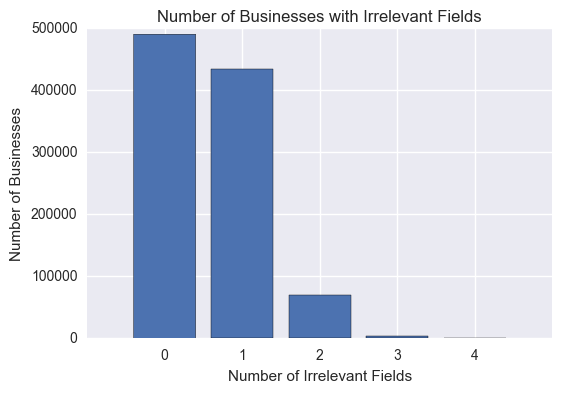

In [38]:
plt.hist(n_miss_list, bins=np.arange(6)-0.4, width=0.8);
plt.xlabel('Number of Irrelevant Fields');
plt.ylabel('Number of Businesses');
plt.title('Number of Businesses with Irrelevant Fields');
plt.xticks(range(5));